In [43]:
import os

import numpy as np
import matplotlib.pyplot as plt
import generator
import seaborn as sns

sns.set_style("dark")

In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
def resample(samples, orig_rate, new_rate, dtype=np.int16, channels=1):
    orig_file = "orig.raw"
    new_file = "new.raw"

    samples.astype(dtype).tofile(orig_file)
    !go run ../cmd/resampler/main.go -ir {orig_rate} -or {new_rate} -ch {channels} {orig_file} {new_file}
    resampled = np.fromfile(new_file, dtype=dtype)

    os.remove(orig_file)
    os.remove(new_file)
    return resampled

In [46]:
def visualize(orig_rate, new_rate, wave_gen):
    orig_samples = wave_gen.sample(orig_rate)
    new_samples = resample(orig_samples, orig_rate, new_rate)
    perfect_samples = wave_gen.sample(1000)

    orig_time = wave_gen.get_time(orig_rate, len(orig_samples))
    new_time = wave_gen.get_time(new_rate, len(new_samples))
    perfect_time = wave_gen.get_time(1000, len(perfect_samples))

    plt.figure(figsize=(18, 6))
    plt.scatter(orig_time, orig_samples)
    plt.scatter(new_time, new_samples)
    plt.plot(perfect_time, perfect_samples)


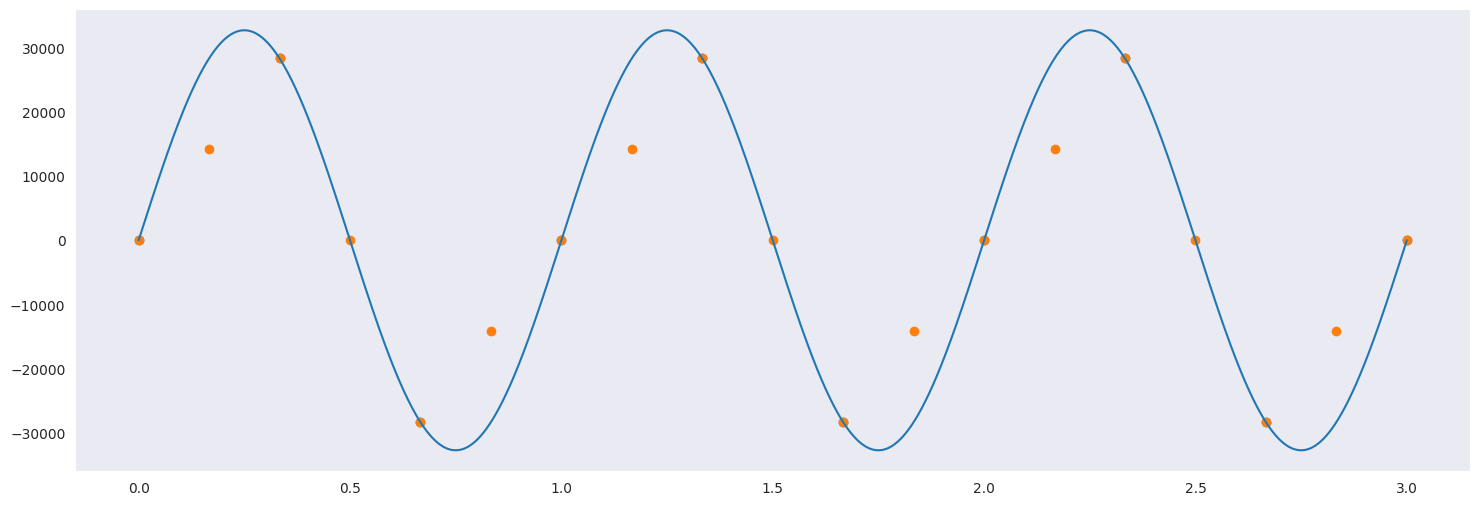

In [47]:
visualize(3, 6, generator.Sine(length=3, quant_bits=16))

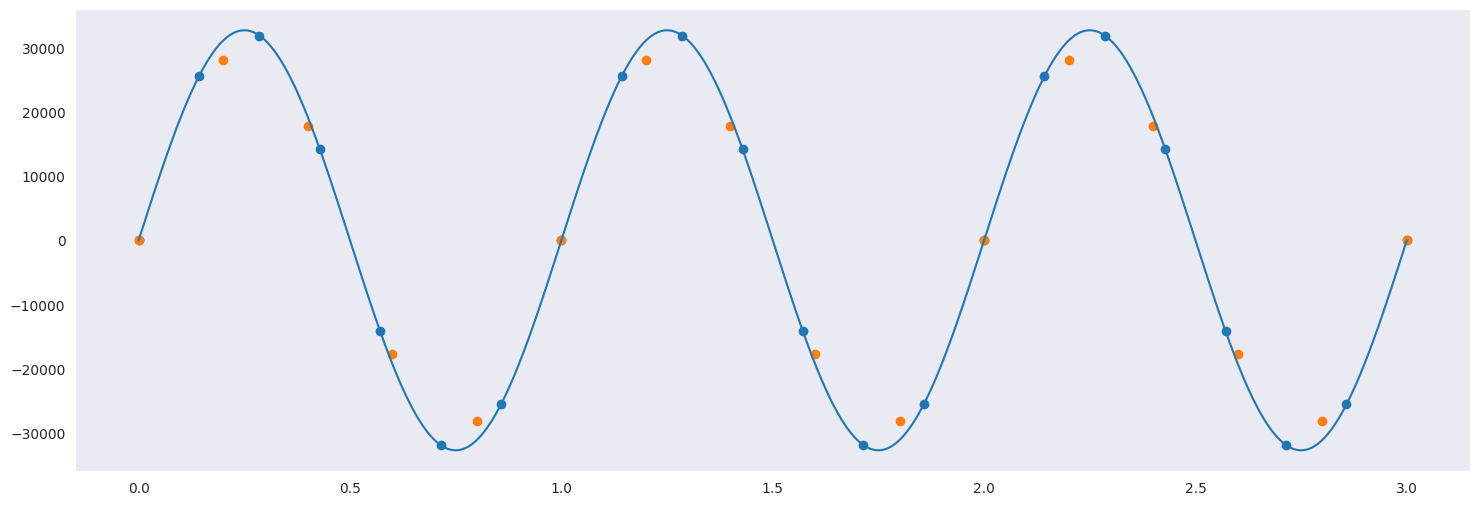

In [49]:
visualize(7, 5, generator.Sine(length=3, quant_bits=16))